Enter the path here:C:\Users\akrit\OneDrive\Desktop\Ghostifying\images\2_.jpg


<Figure size 720x720 with 0 Axes>

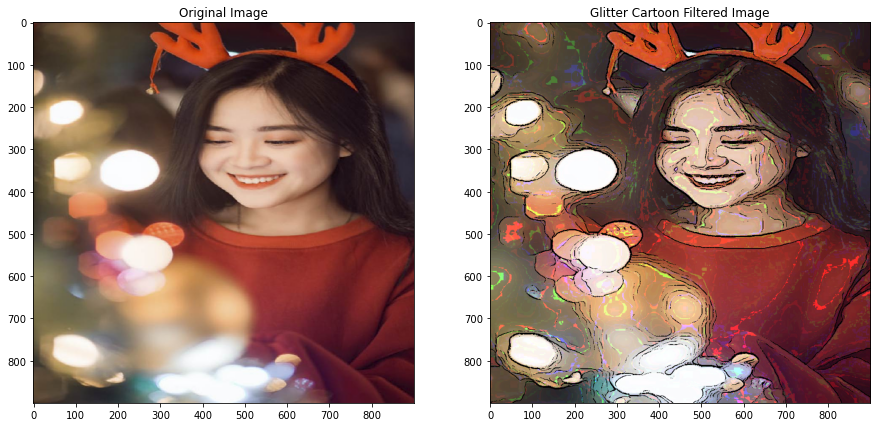

In [27]:
import numpy as np
import cv2
import os.path 

 
img_path = input("Enter the path here:")  #example -> C:\Users\xyz\OneDrive\Desktop\project\image.jpg 



img = cv2.imread(img_path)

from matplotlib import pyplot as plt
#plt.imshow(img)
#plt.show()

image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize= (10,10))
#plt.imshow(image)
#plt.show()

img_small = cv2.pyrDown(image)
num_iter = 10
for _ in range(num_iter):
    img_small= cv2.bilateralFilter(img_small, d=9, sigmaColor=9, sigmaSpace=7)

img_rgb = cv2.pyrUp(img_small)

#plt.imshow(img_rgb)
#plt.show()

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)
img_edge = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 2)

#plt.imshow(img_edge)
#plt.show()

img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
#plt.imshow(img_edge)
#plt.show()


# img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
array = cv2.bitwise_or(image, img_rgb)
final_img = cv2.bitwise_and(array, img_edge)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# display the real image
fig.add_subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(final_img, cmap='gray')
plt.title("Glitter Cartoon Filtered Image")



plt.show()